In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from results import invoke

In [2]:
# test_images = os.listdir("/home/henry/facial-features-detector/data/resized_and_user_images")[:10]
test_images = os.listdir("/Users/henry.dashwood/Documents/facial-features-detector/data/resized_and_user_images")[:10]

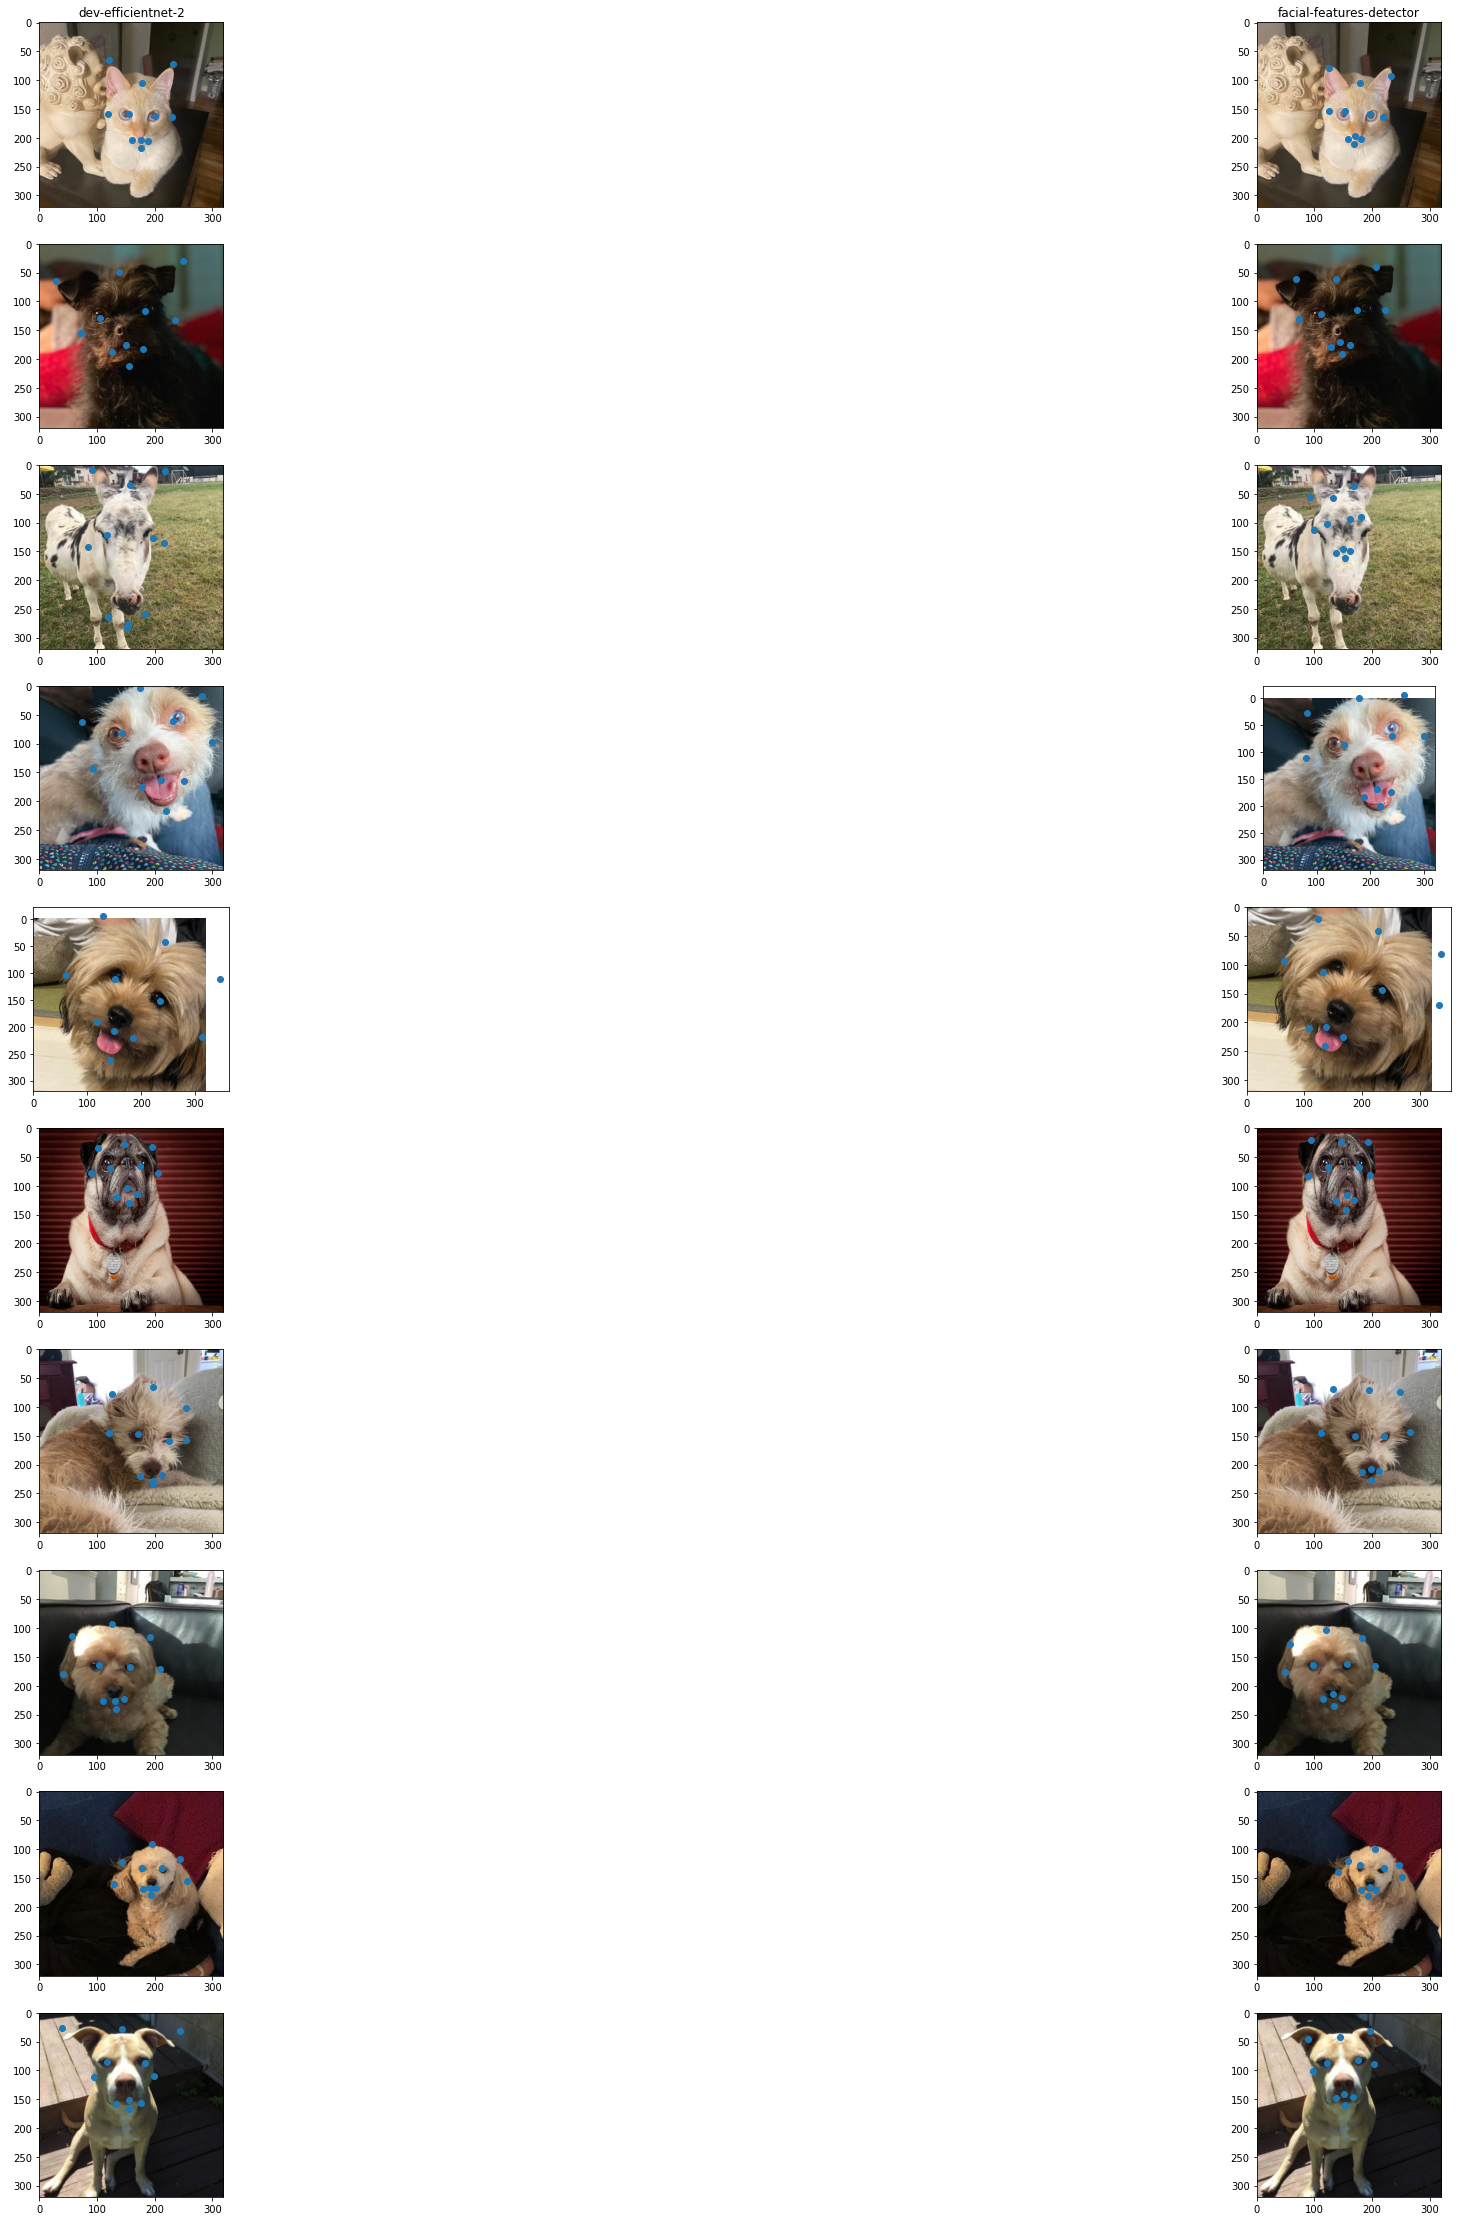

In [3]:
fig, axes = plt.subplots(nrows=len(test_images), ncols=2, figsize=(40, 40))
for ax, col in zip(axes[0], ["dev-efficientnet-2", "facial-features-detector"]):
    ax.set_title(col)
for i, img_name in enumerate(test_images):
    img, preds = invoke("dev-efficientnet-2", f"data/resized_and_user_images/{img_name}")
    axes[i, 0].imshow(np.array(img))
    axes[i, 0].scatter(np.array(preds[0::2]), np.array(preds[1::2]))
    img, preds = invoke("dev-facial-features-detector", f"data/resized_and_user_images/{img_name}")
    axes[i, 1].imshow(np.array(img))
    axes[i, 1].scatter(np.array(preds[1::2]), np.array(preds[0::2]))